## Euler-Lagrange equation of a Double Pendulum

For a double pendulum, the Lagrangian with generalized coordinate $\phi$ is

$\begin{align}
  \mathcal{L} = \frac12 (m_1 + m_2) L_1^2 \dot\phi_1^2 + m_2 L_1 L_2 \dot\phi_1 \dot\phi_2 \cos(\phi_1-\phi_2) + \frac12 m_2 L_2^2 \dot\phi_2^2 + (m_1 + m_2) g L_1 \cos\phi_1 + m_2 g L_2 \cos\phi_2
\end{align}$

The Euler-Lagrange equation is

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot q} = \frac{\partial\mathcal L}{\partial q}   \text{ for }q = \phi_1 \text{ and } q = \phi_2
\end{align}$



In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [4]:
class DoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of the upper pendulum
    L2 : float
        length of the lower pendulum
    g : float
        gravitational acceleration at the earth's surface
    m1 : float
        upper mass
    m2 : float
        lower mass

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1.,  L2=1., m1=1., m2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi_1/dt d^2phi_1/dt^2 dphi_2/dt d^2phi_2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi_1(t), y[1] = dphi_1/dt, y[2] = phi_2(t), y[3] = dphi_2/dt
            
        Returns
        -------
        
        """
        return [y[1], (self.m2*self.g*np.sin(y[2])*np.cos(y[0]-y[2]) - self.m2*np.sin(y[0]-y[2]) * (self.L1 * y[1]**2*np.cos(y[0]-y[2]) + self.L2*y[3]**2) - (self.m1 + self.m2)*self.g*np.sin(y[0]))/self.L1 / (self.m1 + self. m2*np.sin(y[0]-y[2])**2), 
                y[3], ((self.m1+self.m2)*(self.L1*y[1]**2*np.sin(y[0]-y[2]) - self.g*np.sin(y[2]) + self.g*np.sin(y[0])*np.cos(y[0]-y[2])) + self.m2*self.L2*y[3]**2*np.sin(y[0]-y[2])*np.cos(y[0]-y[2]) ) / self.L2 / (self.m1 + self.m2*np.sin(y[0]-y[2])**2)]
    
    def solve_ode(self, t_pts, phi_1_0, phi_dot_1_0, phi_2_0, phi_dot_2_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_1_0, phi_dot_1_0, phi_2_0, phi_dot_2_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi1, phi_dot1, phi2, phi_dot2 = solution.y

        return phi1, phi_dot1, phi2, phi_dot2

In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make simple pendulum plots 

In [7]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')


# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
g = 1.

# Instantiate a pendulum 
d1 = DoublePendulum(L1=L1, L2=L2, g=g, m1=m1, m2=m2)


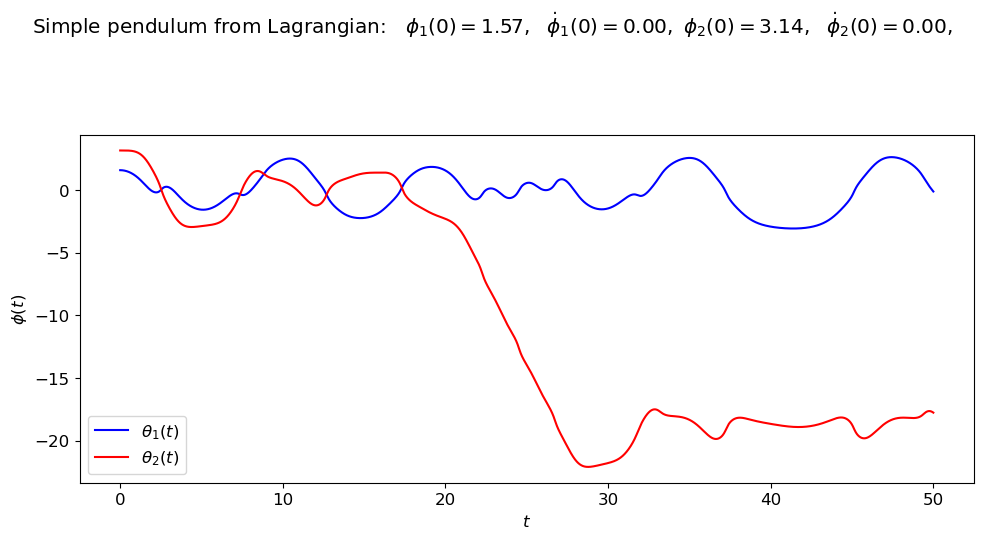

In [8]:
# both plots: same initial conditions
phi_1_0 = (1./2.)*np.pi
phi_dot_1_0 = 0.
phi_2_0 = (1./1.)*np.pi
phi_dot_2_0 = 0.


phi1, phi1_dot, phi2, phi2_dot = d1.solve_ode(t_pts, phi_1_0, phi_dot_1_0, phi_2_0, phi_dot_2_0)


# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Simple pendulum from Lagrangian:  ' + \
                rf' $\phi_1(0) = {phi_1_0:.2f},$' + \
                rf'  $\dot\phi_1(0) = {phi_dot_1_0:.2f},$' + \
                rf' $\phi_2(0) = {phi_2_0:.2f},$' + \
                rf'  $\dot\phi_2(0) = {phi_dot_2_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# plot of angles
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$', 
            ax=ax_a)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$', 
            ax=ax_a)    

fig.tight_layout()

Compared to the simple pendulum, this is a far more complex and unpredictable set of motions. To show that beyond small angle approximations, the motion is chaotic, lets change the initial conditions just a little

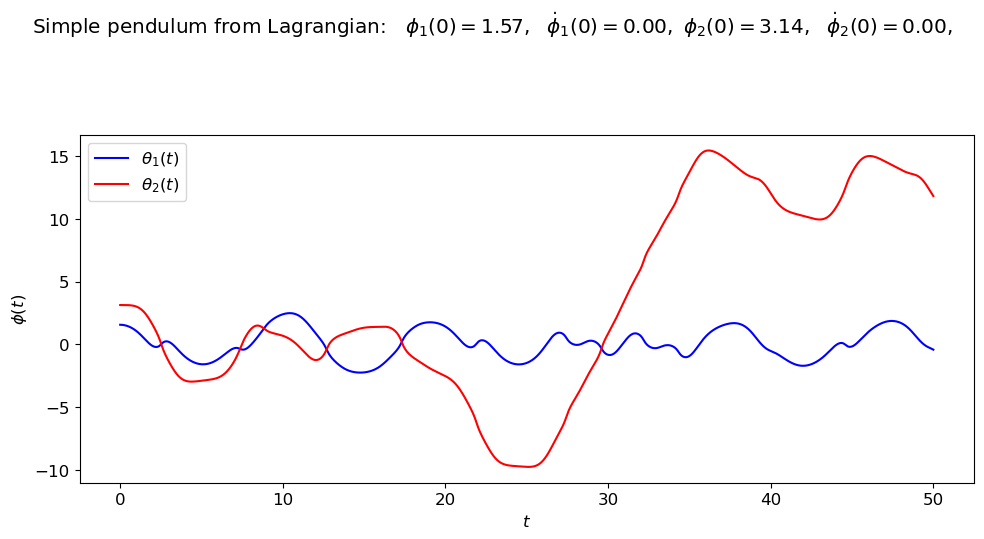

In [9]:
# both plots: same initial conditions
phi_1_0 = (1./2.)*np.pi - 0.0001
phi_dot_1_0 = 0.
phi_2_0 = (1./1.)*np.pi + 0.0001
phi_dot_2_0 = 0.


phi1, phi1_dot, phi2, phi2_dot = d1.solve_ode(t_pts, phi_1_0, phi_dot_1_0, phi_2_0, phi_dot_2_0)


# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Simple pendulum from Lagrangian:  ' + \
                rf' $\phi_1(0) = {phi_1_0:.2f},$' + \
                rf'  $\dot\phi_1(0) = {phi_dot_1_0:.2f},$' + \
                rf' $\phi_2(0) = {phi_2_0:.2f},$' + \
                rf'  $\dot\phi_2(0) = {phi_dot_2_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# plot of angles
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$', 
            ax=ax_a)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$', 
            ax=ax_a)    

fig.tight_layout()

This is obviously drastically different from what we had before even though the changes in initial conditions were so small.